<html>
<h1 style="text-align: center;">Peer to peer</h1>
<h3 style="text-align: center;">streaming capacity</h3>
<br />
</html>


# Contents
1. Introduction
2. Construction of mutitree
3. Primal-Dual Algorithm
   * Problem formulation
   * Smallest price tree problem
4. Numerical result
   * optimality
   * theoretical vs empirical convergence
5. (How to avoid free riding?)  <- It is interesting if we can discuss it.
5. Conclusion  
 
6. References

## 1. Introduction


==========Need to write==========




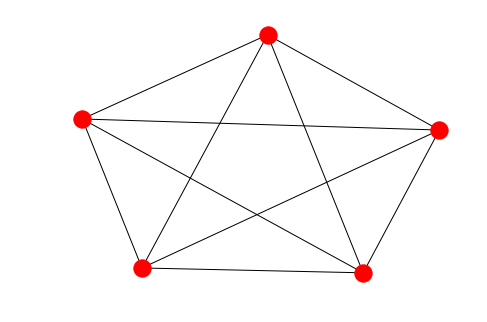

In [4]:
# example of a complete graph
import networkx as nx
import matplotlib.pyplot as plt
K_5=nx.complete_graph(5)
nx.draw(K_5)
plt.show()

## 2. Construction of mutitree
Here we introduce the optimal construction of multitree with the simplest topology, i.e. full mesh, no degree bound and without helper nodes. 
Let's begin with a little reminder : A Multi-Tree architechture is a combinaison of different trees of a network. It is used to get higher capacity performance.

In [ ]:
G = nx.DiGraph()
G.add_nodes_from([0,1,2,3,4])
G.add_edges_from([(0, 1),(1, 2), (1, 3),(2, 4)])
color_map_G = ['blue','green','green','red','red']

F = nx.DiGraph()
F.add_nodes_from([0,1,2,3,4])
F.add_edges_from([(0, 3),(3, 4), (4, 2),(4, 1)])
color_map_F = ['blue','red','red','green','green']

plt.subplot(121)
nx.draw(G,node_color=color_map_G, with_labels=True,font_weight='bold')
plt.subplot(122)
nx.draw(F,node_color=color_map_F,with_labels=True,font_weight='bold')
plt.show()

As you can see on the 2 graphs above, the stream capacity of every node is not fully used (3 & 4 for graph 1 and 1 & 2 for graph 2). Thus, a Multi-Tree would benefit to use the upload capacity of every peer.

The construction of a Multi-Tree is not a exact science since it requires to solve difficult combinatorial optimization problem. But the basic idea is to put the peers with a lot of leftover upload capacity higher up in the Multi-Tree and in some special cases, the equation is easy to solve ! Let me show you: let's assume that every peer has a capacity of download illimited. Then we want to prove that the total amount of time of downloading T is the larger of the two following numbers : 

$T = max\{\frac{F}{u_s} , \frac{NF}{u_s + \sum_{i=1}^Nu_i}\} $  <-->  $ r_{max} = min\{ u_s , \frac{u_s + \sum_{i=1}^Nu_i}{N} \} $

This relation can be proved using its inversed relation : the maximum broadcast rate $r_max$ is just the inversed of the first relation, it can also be used to solve the problem. Thus, two different cases appear : One is when the upload capacity of the server $u_s$ is smaller then the mean of every peer's capacity and the second one is the opposite situation

### 2.1 case 1:  $u_s \leq \frac{(u_s + \sum_{i=1}^Nu_i)}{N}$


In this situation, the maximum broadcast rate of $r_{max} = u_s$ can be supported. So the multi-tree would be a combinaison of N two-hop trees where each tree is composed like the following :

In [ ]:
G = nx.DiGraph()
G.add_node(0,pos=(2,4)), G.add_node(1,pos=(2,3)), G.add_node(2,pos=(1.5,2)),G.add_node(3,pos=(2,2)),G.add_node(4,pos=(2.5,2))
G.add_edges_from([(0, 1),(1, 2), (1, 3),(1, 4)])
pos1=nx.get_node_attributes(G,'pos')

F = nx.DiGraph()
F.add_node(0,pos=(2,4)), F.add_node(2,pos=(2,3)), F.add_node(1,pos=(1.5,2)),F.add_node(3,pos=(2,2)),F.add_node(4,pos=(2.5,2))
F.add_edges_from([(0, 2),(2, 1), (2, 3),(2, 4)])
pos2=nx.get_node_attributes(F,'pos')

D = nx.DiGraph()
D.add_node(0,pos=(2,4)), D.add_node(3,pos=(2,3)), D.add_node(1,pos=(1.5,2)),D.add_node(2,pos=(2,2)),D.add_node(4,pos=(2.5,2))
D.add_edges_from([(0, 3),(3, 1), (3, 2),(3, 4)])
pos3=nx.get_node_attributes(D,'pos')

S = nx.DiGraph()
S.add_node(0,pos=(2,4)), S.add_node(4,pos=(2,3)), S.add_node(1,pos=(1.5,2)),S.add_node(2,pos=(2,2)),S.add_node(3,pos=(2.5,2))
S.add_edges_from([(0, 4),(4, 1), (4, 2),(4, 3)])
pos4=nx.get_node_attributes(S,'pos')
color_map = ['blue','green','red','red','red']

plt.subplot(141)
nx.draw(G,pos1,node_color=color_map,with_labels=True,font_weight='bold')
plt.subplot(142)
nx.draw(F,pos2,node_color=color_map,with_labels=True,font_weight='bold')
plt.subplot(143)
nx.draw(D,pos3,node_color=color_map,with_labels=True,font_weight='bold')
plt.subplot(144)
nx.draw(S,pos4,node_color=color_map,with_labels=True,font_weight='bold')
plt.show()

In this configuration, we can clearly see that the trees that have peers with a high upload capacity near the root with stream the informations at a higher rate. 

Since the total upload required for the server equals its capacity, $\sum_{i=1}^Nr_i = u_s$, we can find that each tree's rate is equal to : $r_i = \frac{u_i}{\sum_{j=1}^Nu_j}$.

Given these 2 relations about the rate ofeach peer and starting from the assumption of this case, we can find the total upload capacity required for every peer i :

$N u_s \leq (u_s + \sum_{i=1}^Nu_i) \Longrightarrow N u_s (\frac{u_i}{\sum_{j=1}^Nu_j}) \leq \frac{u_i u_s}{\sum_{j=1}^Nu_j} + u_i \iff (N - 1) \frac{u_i}{\sum_{j=1}^Nu_j} u_s \leq u_i$

It implies that the total upload capacity required for each peer would equal : $ (N - 1) r_i = (N - 1) \frac{u_i}{\sum_{j=1}^Nu_j} u_s \leq u_i$. 

It now means that each peer in the Multi-Tree Structure receives a data stream directly from the server and it receives also (N-1) streams from the other peers. The result is that each peer i will have a broadcast rate equals to : $r_{max} = r_i + \sum_{j \neq 1}^Nr_j $.

Hence, looking back at the equation of the total downloading time of a file will be $T = \frac{T}{u_s}$.

### 2.1 case 2: $u_s > \frac{(u_s + \sum_{i=1}^Nu_i)}{N}$

In this situation, the maximum broadcast rate supported would be equal to $r_{max} = \frac{(u_s + \sum_{i=1}^Nu_i)}{N}$ and the server upload capacity is large enough to stream to every peer directly in addition to stream via a two hop Multu-tree system like in the first case ! Thus, the Multi-Tree of such a configuration would look like just the first case adding this sub-tree : 

In [ ]:
G = nx.DiGraph()
G.add_node(0,pos=(2.5,4)), G.add_node(1,pos=(1,3)), G.add_node(2,pos=(2,3)),G.add_node(3,pos=(3,3)),G.add_node(4,pos=(4,3))
G.add_edges_from([(0, 1),(0, 2), (0, 3),(0, 4)])
pos1=nx.get_node_attributes(G,'pos')
color_map = ['blue','red','red','red','red']
nx.draw(G,pos1,node_color=color_map,with_labels=True,font_weight='bold')
plt.show()

In this case,each ith two hop tree of the Multi-tree would stream with a constant rate : $ r_i = \frac{u_i}{N-1}$ and the N+1 tree (the server client subtree) would carry a rate of $ r_{N+1} = \frac{u_s + \frac{\sum_{i=1}^Nu_i}{N-1}}{N}$. 

It thus means that the total upload capaccity required for each peer i would be $(N-1) r_i = u_i$ and furthermore that the total upload capacity required for server is equal to the sum of every rate passing throught the first peer of each two hop tree and the product of N times the rate throught out each peer in the one hop tree : $\sum_{i=1}^Nr_i + N \cdot r_{N+1}$. Taking the expression of each term we obtain the following equation : $ \frac{u_i}{N-1} + N \cdot \frac{u_s + \frac{\sum_{i=1}^Nu_i}{N-1}}{N}$. In this formula, the first term cancels out with the third one and the result is equal to $u_s$.

In that case, the total broadcast rate at which any peer i in the network receives informations is : $r_{max} = r_{server} + r_{(N-1)peers}  \iff r_{max} = r_i + N \cdot r_{N+1} + \sum_{j \neq i}r_j$.

$ \iff \frac{u_i}{N - 1} + N \cdot \frac{u_s + \frac{\sum_{i=1}^Nu_i}{N-1}}{N} + \sum_{j \neq i} \frac{u_j}{N-1} \Longrightarrow r_{max} = \frac{u_s + \sum_{i=1}^Nu_i}{N}$

Knowing the maximal broadcast rate, we can determine the total amount of time to upload a file looking back at the equation in the introduction of this section : $ T =  \frac{NF}{u_s + \sum_{i=1}^Nu_i}$


### 2.3 Example problem
show a smiple example.

## 3. Primal-Dual algorithm
The method we have introduced is not general, it only works for the certain case. Here we show the method proposed by Sengupta et al. which solves the problem by using primal-dual loops.


%%%%%%%% NEED TO WRITE %%%%%%%%%%%%%%

### 3.1 Problem formulation (combinatorial optimization)
Here we first show the mathematical formulation of the P2P model. Let us denote the following notations:

- $V$: set of all nodes
- $r$: streaming rate
- $s$: server node (single) 
- $R$: set of receivers
- $H$: set of helpers
- $T$: set of all possible overlay trees on the underlay graph
- $C(v)$: capacity of node $v \in V$
- $y_t$: rate of tree $t$
- $m_{v,t}$: outgoing degree of node $v$ in tree $t$
- $M(v)$: degree bound of node $v \in V$
- $p(v)$: price of node $v \in V$

A given packet starts from the server $s$, and it traverses all receivers $R$. As we discussed before, in order to get the efficient rate, we apply the *multitree*, which overlay trees simultaneously. Each tree $t$ has a rate $y_t$ and we want to maximize the streaming rate which corresponds to the sum of $rate$ among all possible trees, i.e. $r = \sum_{t \in T}$. If we do not use a tree $t$, then its rate is simply zero: $y_t = 0$.  $m_{v,t}$ is the number of outgoing degree of node $v$ in tree $t$. Thus,  node $v$'s uplink rate in tree $t$ can be defined as $m_{v,t}y_t$, and its sum over all trees must be smaller than the capacity: $\sum_{t\in T}m_{v,t} y_t \leq C(v) $.
We also introduce the degree bound for a node $M(v)$. It comes from the practical reason: in BitTorrent, even though we can have about 50 neighours in a graph, the number of peer to upload is limited to five.  Obviously, $m_{v,t} \leq M_v$.

Now our problem can be expressed in the following combinatorial optimizatoin problem. 
\begin{align}
& \max & & r  =\sum_{t \in T}y_t \\
& \ \text{s.t.} & & \sum_{t\in T}m_{v,t} y_t \leq C(v) & \forall v\in V\\
& & & y_t \geq 0 & \forall t\in T\\
\end{align}

The bottoleneck of  this formulation is that it has too many variables $y_t$, since usually the number of possible tree $|T|$ grows exponentially with number of nodes in the graph. Hence, let's take the dual of the problem as we always do. 
\begin{align}
& \min & & \sum_{v \in V}C(v)p(v)  \\
& \ \text{s.t.} & & \sum_{v \in V}m_{t,v}  p(v)\geq 1 & \forall t\in T\\
& & & p(v) \geq 0 & \forall v\in V\\
\end{align}

The dual variable $p(v)$ can be intrepreted as the price of the node to go through, and we minimize the cost incurred when the capacity of all nodes are fully used. The cost by using node $v$ in tree $t$ is $m_{v,t}p(v)$, and thus the price of tree $t$ is the sum among all nodes: $\sum_{v\in V} m_{v,t}p(v)$. Therefore, the constrain represents that we have to build trees such that its prices are at least 1.  This formulation seems nice because the number of variables decreases drastically, just the number of nodes. However, it has the exponential number of constraints, and neither of them are difficult to solve directrly. 


%%%%%%%% NEED TO WRITE %%%%%%%%%%%%%%

#### Algorithm
1. Find the smallest price tree (SPT) -> inner loop
2. Obtain the flow (rate) of SPT
3. Update the price 


### 3.2 Smallest price tree (SPT)
Now the problem is that "How to find the SPT in efficient way?" We tackle this issue for the following five underlay graph topologies:
1. Full mesh graph, no degree bound, no helper
2. Full mesh graph, with degree bound, with helper
3. Full mesh graph, no degree bound, no helper
4. Full mesh graph, wiht degree bound, with helper
5. General graph, no degree bound, no helper

The larger index, the more complicated to solve. Let's look at one by one.

#### 3.2.1 Type1: Full mesh no degree bound no helper
This topology is actually same as we have seen in section 2.

Finding SPT is quite easy. Picking the smallest price node $v^* = \text{argmin}_{v\in V}p(v) $ (if there are several smallrest node, say choosing one randomly among them), and if it is the server, build a 1-hop tree: $s \to v $ for $v \in R$. Otherwise, just build the 2-hop tree such that $s \to v^*$ and $v^* \to v$ for $v \in R\ \{v^*\}$. Here is the examle.

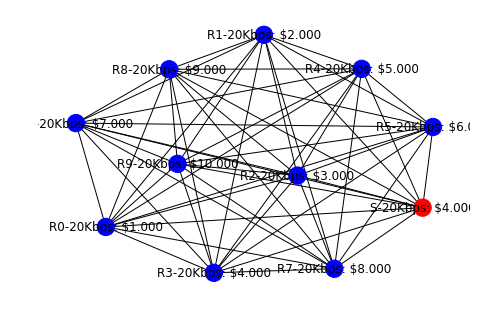

In [5]:
from source import *

N = 10  # number of receivers
Capacity = 20
inf = float('inf')
# initialization of nodes
server = Node('s', Capacity, inf, None, 4)
receivers = []
for i in range(N):
    receivers.append(Node('r', Capacity, inf, i, i+1))  # initialize the receivers
graph_1 = Graph(1, server, receivers)
plot_graph(graph_1)  # show full mesh underlay graph


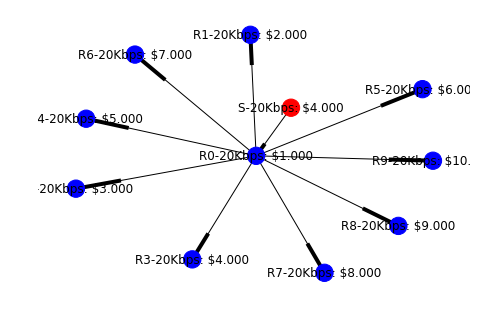

In [6]:
# find the SPT
t, price = smallest_price_tree1(graph_1)  
plot_tree(t) # plot
# will be 2- hop tree

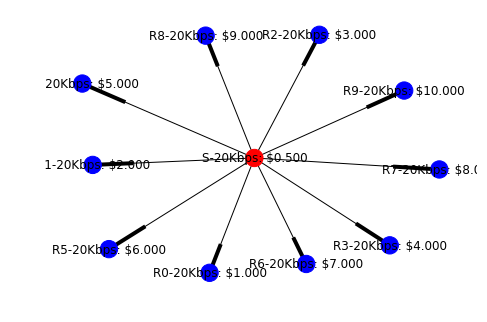

In [7]:
# when the price of the server is cheapest
server.price = 0.5
t, price = smallest_price_tree1(graph_1)  
plot_tree(t) # plot
# 1-hop tree, Obvious ...... :) 

#### 3.2.2 Type2: Full mesh no degree bound with helper
With helper nodes, it would be a littile bit complicated.  We introduece the *effective price*  which is defined as follows:

\begin{equation}
\hat{p}(v) = 
\begin{cases}
p(v)    &\text{if } v \in s \cup R\\
p(v)\frac{|R|}{|R|-1}    &\text{if } v \in H
\end{cases}
\end{equation}

The idea is following: since if SPT has helper node in it, the number of nodes in tree will be higher than without them.   Thus when we asses the price of the nodes, we have to consider that aspect, indeed, the smallest price can be computed as:

$$ p_s + \min \{ (N-1)p_s, (N-1)p_r, Np_h\}$$

where $p_s, p_r$ and $p_h$ represent the price of the server, the minimum price of receivers and the minimum price of the helpers respectively. The SPT is one of the following three cases: 1)the server supports all receives, 2) the server supports min price receiver, and it take care the other receivers, and 3) the server use the min price helper and it supports all receivers. 


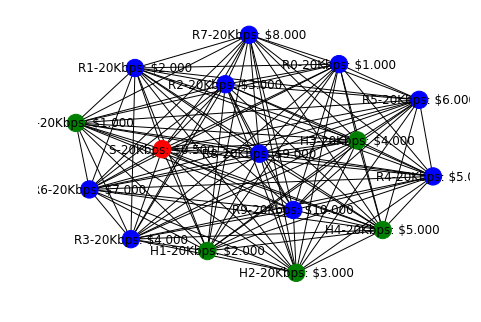

In [8]:
# Example
# add the helpers
helpers =[]
H = 5
for i in range(H):
    helpers.append(Node('h', Capacity, inf, i, i+1))
    
graph_2 = Graph(2, server, receivers,helpers)
plot_graph(graph_2) 

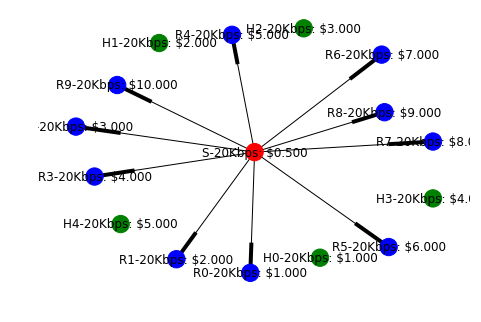

Price : $5.0


In [9]:
# compute SPT
t2, price2 = smallest_price_tree2(graph_2)  
plot_tree(t2) # plot
print('Price : ${0}'.format(price2))
## helpers are not in the SPT

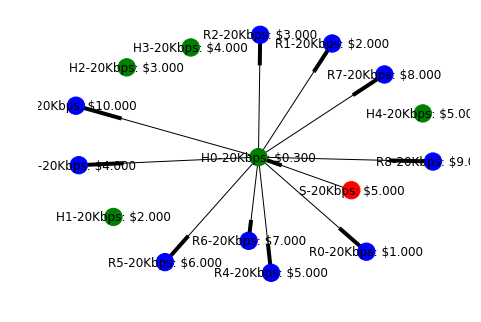

Price : $8.0


In [10]:
# when a helper is cheap
server.price = 5
helpers[0].price = 0.3
t2, price2 = smallest_price_tree2(graph_2)  
plot_tree(t2) # plot
print('Price : ${0}'.format(price2))
# 2-hop tree

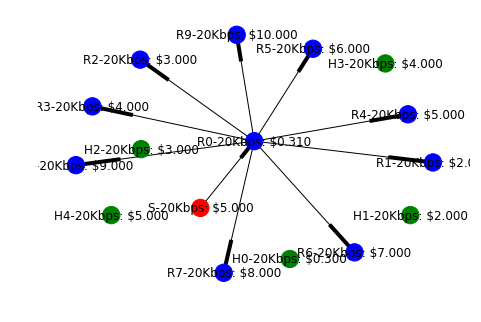

Price : $7.790


In [11]:
# when the price of cheapest helper <  that of receivers
# but it will not be selected...
helpers[0].price = 0.3
receivers[0].price = 0.31
t2, price2 = smallest_price_tree2(graph_2)  
plot_tree(t2) # plot
print('Price : ${0:.3f}'.format(price2))
# 2-hop tree without helpers, node 'H0' is the cheapest but not selected
# because of the efficient price

#### 3.2.3 Type3: Full mesh with degree bound no helper
If there is degree bound, we need to build the tree with lager than 2-hop. Let sort the receivers w.r.t. the price:

$$p(1) \leq p(2) \leq ... \leq p(|R|) $$

The idea of SPT is to support by using the cheapest nodes as much as possible. Precisely, we first define following function $I$:

$$  I(n,M) = \min \{ i \in R | \sum_{v=1}M(v) \geq n \}$$

where $M$ is the set of all degree bounds. 
It can be interpreted as "Receiver 1 to Receiver $I(n,M)$ can support $n$ nodes". Considering sever supports $m(s)$ receivers, then the SPT is to support 

\begin{equation}
m(v) = 
\begin{cases}
m(s)    &\text{if } v = s \\
m(v)   &\text{if } 1  \leq v < I(|R|-m(s)),M)   \\
m_I   &\text{if } v =    I(|R|-m(s)),M)   \\
0 &\text{if } v >  I(|R|-m(s)),M)  
\end{cases}
\end{equation}

where $ m_I  = |R| - m(s) \sum_{j = 1}^{  I(|R|-m(s)),M) -1}$, i.e. the rest of nodes that  are not supported by the receivers 1 to $m_I -1$.  And the SPT is the minimum among $1 \leq m(s) \leq M(s)$. In the mathematical form, it seems complicated but the idea is quite simple. Let's look at the following small example.

<html>
<body>

<img src="images/fig1.png" width="700" >

</body>
</html>

In this example, we have the server with price $5, and the 4 receivers with $1 to $4. Degree boundis set to 2 for all nodes .  As can be seen, we would like to use the cheapest node, 1 then node 2... and so on. Hence, the SPT is either case (a) or (b), indeed  it is (s) here.  Let's look harder example.

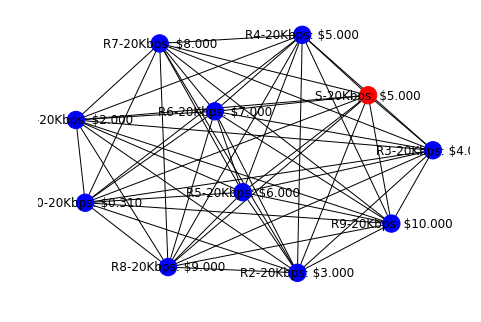

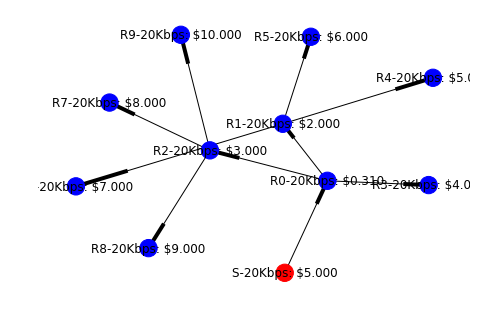

Price : $20.930


In [12]:
##  Example
M = 3 # degree bound is set to 3 for all nodes
graph_3 = Graph(3, server, receivers, None, M)
plot_graph(graph_3)  # visualization
# Note that underlay graph is still full mesh

# compute SPT
t3, price3 = smallest_price_tree3(graph_3)  
plot_tree(t3) # plot
print('Price : ${0:.3f}'.format(price3))
# the smallest price nodes are fully using their degree capacities

#### 3.2.3 Type4: Full mesh with degree bound with helper
Here, we study the most general case in the full mesh graph.  Let us consider the following assumptions:

- Degree bound of the server is set to infinity: $M(s) = \infty$
- Degree bound $M(v)$ is same among all receivers and helpers

As we have seen before, when there are helper nodes, we have to assess them by the *effective price* since their participation increases the number of edges and nodes than helper free ones.  Hence we have to compare with a "proper" measure. Let' look at the following example.
<html>
<body>

<img src="images/fig2.png" width="600" >

</body>
</html>

(a) has a helper node $H_1$, whose number of edges is 6.  We replace it by a leaf node $R_5$, and to keep the degree of its parent node $R_3$, we take one of the helper's child, $R_2$ here. Then we now posses a new tree (b) of which the number of total edges 5, degresesd by 1. Hence, their difference of price can be expressed as:

$$ Q((a), p) -Q((b), p) = 2 \times p(R_5) - 3\times p(H_1) $$

Thus, we have to compare $\frac{mp(v_h)}{m-1}$ with $p(v_r)$ where $m$ is the degree of the helper $v_h$, i.e. the effective price of helpes will be $\hat{p}(v_h) = \frac{m}{m-1}p(v_h)$ for all $v_h \in H$.  Let's have a look at the small example.

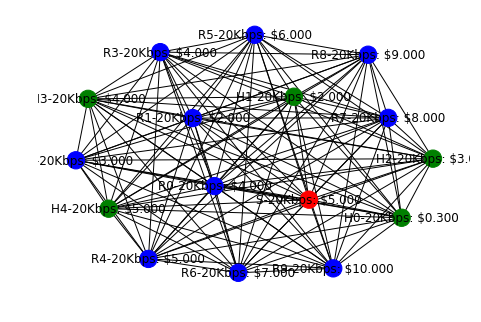

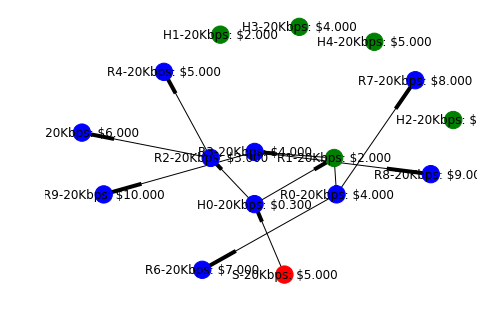

Price : $31.600


In [13]:
## Example 
M = 2  # degree bound
receivers[0].price = 4
graph_4 = Graph(4, server, receivers, helpers, M)  # Form 4: Full mesh, With degree bound, With helper
plot_graph(graph_4)  # visualization
# bit messy....

t4, price4 = smallest_price_tree4(graph_4, M)
plot_tree(t4) # plot
print('Price : ${0:.3f}'.format(price4))
# hard to see...

#### 3.2.3 Type5: General Graph, no degree bound no helper = minimum cost arborescence problem 

Finally, we follow the general graph case while the simplest case, where there is no helper and no degree bound. Unlike so far, a node is not directly connected to all the others yet some of them. In this case, the SPT problem will be *the minimum cost arborescence problem*, which is originally solved by <span style="color:red">[citation needed]</span> 
It can be considered as directed version of minimum spanning tree problem with a sourse node. 

An algorithm to solve this problem is known as *Edmonds' algorithm*. It mainly consists of two parts: 1) contracting 2) expanding. The idea of 1) contracting is that if there is a cycle in a graph, we make the nodes in the cycle to contract and regard them as a single node. We continue this process until finding an arborescence tree.  Then we do 2) expanding, i.e. expand the contracted nodes so as to keep arborescence property. Let's look the following toy graph: 

<html>
<body>

<img src="images/ed1.png" width="400" >

</body>
</html>

where the price of server is $\$5$  and the receiver $i$'s price is $\$i$.  Note that the we ommit the edges form receiver 1 and 2 to the server since it is meaningless. 

Following figures demonstrate Edmonds' algorithm step by step. 

<html>
<head>
<meta http-equiv="Content-Type" content="text/html; charset=UTF-8">
<title>Untitled Document</title>
</head>
<body>    
<div style=" background-color:white; overflow:scroll; overflow-x: scroll; overflow-y: hidden;">
       <div style="width:10000px;">
       
       <figure style=" float:left; display:inline">
          <img src="Images/ed1.png"  width="300" hspace="20" vspace="5">
          <figcaption style="text-align: center;">(1) Original Graph</figcaption>
        </figure>
       <figure style=" float:left; display:inline">
          <img src="Images/ed2.png"  width="300" hspace="20" vspace="5">
          <figcaption style="text-align: center;">(2) Find minimum incoming edges</figcaption>
        </figure>
       <figure style=" float:left; display:inline">
          <img src="Images/ed3.png"  width="300" hspace="20" vspace="5">
          <figcaption style="text-align: center;"> (3) Update cost</figcaption>
        </figure>
        <figure style=" float:left; display:inline">
          <img src="Images/ed4.png"  width="300" hspace="20" vspace="5">
          <figcaption style="text-align: center;">(4) Find a cycle and contraction</figcaption>
        </figure>
</div>        
</div> 
<div style=" background-color:white; overflow:scroll; overflow-x: scroll; overflow-y: hidden;">
       <div style="width:10000px;">
       <figure style=" float:left; display:inline">
          <img src="Images/ed5.png"  width="300"　hspace="20" vspace="5">
          <figcaption style="text-align: center;">(5) Create a new graph</figcaption>
        </figure>
       <figure style=" float:left; display:inline">
          <img src="Images/ed6.png"  width="300" hspace="20" vspace="5">
          <figcaption style="text-align: center;">(6) Find minimum incoming edges </figcaption>
        </figure>
       <figure style=" float:left; display:inline">
          <img src="Images/ed7.png"  width="300" hspace="20" vspace="5">
          <figcaption style="text-align: center;">(7) Find a cycle and contraction</figcaption>
        </figure>
       <figure style=" float:left; display:inline">
          <img src="Images/ed8.png"  width="300" hspace="20" vspace="5">
          <figcaption style="text-align: center;">(8) Reach an arborescence</figcaption>
       </figure>
</div>
 </div>
 
<div style=" background-color:white; overflow:scroll; overflow-x: scroll; overflow-y: hidden;">
       <div style="width:10000px;">
      
        <figure style=" float:left; display:inline">
          <img src="Images/ed9.png"  width="300" hspace="20" vspace="5">
          <figcaption style="text-align: center;">(9) Expansion 1</figcaption>
        </figure>
       <figure style=" float:left; display:inline">
          <img src="Images/ed10.png"  width="300" hspace="20" vspace="5">
          <figcaption style="text-align: center;">(10) Expansion 2</figcaption>
        </figure>
       <figure style=" float:left; display:inline">
          <img src="Images/ed11.png"  width="300" hspace="20" vspace="5">
          <figcaption style="text-align: center;">(11)  minimum cost arborescence</figcaption>
        </figure>
       
</div>
 </div>
 
</body>
</html>

We also see the pyhon example below.

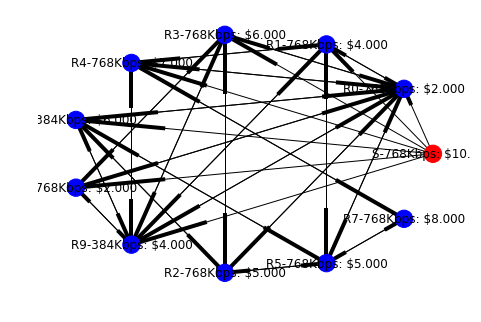

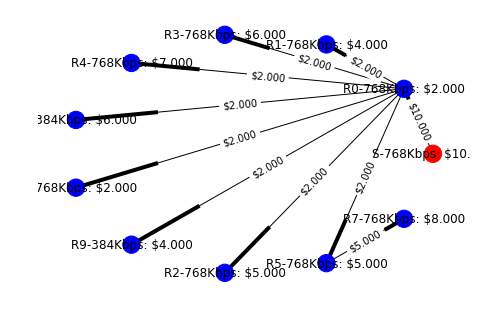

In [21]:
## Example: General Graph
# build an general underlay graph (randomly)
N = 10 #number of receivers
p = 0.5  # probability of having edges
price = [10,2,4,5,6,7,5,6,8,2,4] # price vector: price[0] for the server, 1 to 10 for the receivers
underlay_graph, color_map, node_labels = build_general_graph(N, p, price, 1)

# visualize the neighborhood relationship (underlay Graph)
pos = nx.shell_layout(underlay_graph)
nx.draw(underlay_graph, node_color=color_map, pos=pos, labels=node_labels)
plt.show()


## find the minimum cost arborescence 
t = nx.algorithms.tree.branchings.minimum_spanning_arborescence(underlay_graph)  # use the function of NetworX
# retrieve the labels
edge_labels = {}
for e in t.edges(data=True):
    edge_labels.update({(e[0], e[1]): '$' + str.format('{0:.3f}', e[2]['weight'])})
# visualization
pos = nx.shell_layout(t)
nx.draw(t, pos=pos,node_color=color_map, labels=node_labels)
nx.draw_networkx_edge_labels(t, pos=pos, edge_labels=edge_labels)
plt.show()

## 4. Numerical result
### 4.1 Optimality
The primal-dual algorithm is not exact, we compare with the multi-cast forumulation.  (implement the algorithms for some toy topologies... )
### 4.2 Convergence
show the convergence of the algorithm vs the theoritical upper bound

Capacity of server: 768
Average capacity  : 588.8
Loop: 1000, Time: 0.062, Price: 0.000000
Loop: 2000, Time: 0.116, Price: 0.000000
Loop: 3000, Time: 0.174, Price: 0.000000
Loop: 4000, Time: 0.231, Price: 0.004720
Number of loop: 4364, Total time: 0.254

Price of the min tree   : $1.010
Value of dual objective : $585.819
Approx capacity rate    : $586.909


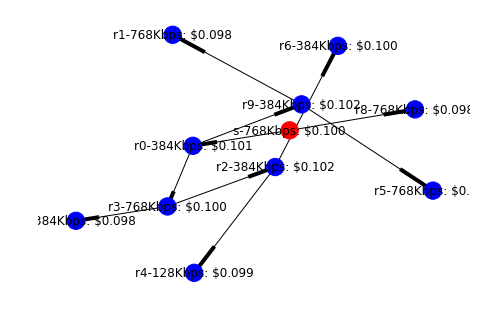

In [6]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from source import *

# Set Parameters
N = 10  # number of receivers
H = 5  # number of helpers
M = 2  # Degree bound
# M = N + 1  # NO Degree bound here
V = N + H + 1  # number of nodes (+ server) with helper
C = distribution(N)  # Decide the value of capacity for RECEIVERS
Ch = distribution(H)  # Decide the value of capacity for HELPERS
zeta = 0.1  # value for optimality
eps = 1 - 1 / np.sqrt(1 + zeta)  # rate for updating price
delta = (1 + eps) / (((1 + eps) * (N+1)) ** (1 / eps))  # value for the initial price Without helper
delta_h = (1 + eps) / (((1 + eps) * V) ** (1 / eps))  # value for the initial price With helper

# initialization of nodes
server = Node('s', 768, N + H + 1)  # fix the capacity to 768Kbps
receivers = []
helpers = []
for i in range(N):
    receivers.append(Node('r', C[i], N + H + 1, i))  # initialize the receivers
for i in range(H):
    helpers.append(Node('h', Ch[i], N + H + 1, i))  # initialize the helpers
graph_1 = Graph(1, server, receivers)              # Form 1: Full mesh, No degree bound, No helper
graph_2 = Graph(2, server, receivers, helpers)     # Form 2: Full mesh, No degree bound, With helper
graph_3 = Graph(3, server, receivers, None, M)     # Form 3: Full mesh, With degree bound, No helper
graph_4 = Graph(4, server, receivers, helpers, M)  # Form 4: Full mesh, With degree bound, With helper

# initialize the price for all Forms
graph_1.ini_price(delta)
graph_2.ini_price(delta_h)
graph_3.ini_price(delta)
graph_4.ini_price(delta_h)
# solution of multi-casting, only works for Form 1
print('Capacity of server: {0}'.format(server.capacity))
print('Average capacity  : {0}'.format((sum(C) + server.capacity) / N))

###################
###  Algorithm  ###
###################

# output_capacity, num_loop = primal_dual_single_session(graph_1, eps)
# output_capacity, num_loop = primal_dual_single_session(graph_2, eps)
output_capacity, num_loop = primal_dual_single_session(graph_3, eps)


## 5. Conclusion

## 6. References
